<a href="https://colab.research.google.com/github/nonyeashley/Network-Intrusion-Detection-Using-Ensemble-Method-/blob/main/Network_Intrusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# Importing packages to load and preview data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## declaring a variable
train_file_path ='/content/drive/MyDrive/IoT Network Intrusion Dataset.csv'
## variable name holding my dataset ("train_file_path")
df = pd.read_csv(train_file_path)
## variable name "df" allows me to read my dataset

In [4]:
df.head(5) ## checking the first 5 columns of the dataset

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [5]:
df.tail(5) ## checking the last 5 columns of the dataset

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
625778,192.168.0.24-210.89.164.90-56112-8043-17,192.168.0.24,56112,210.89.164.90,8043,17,25/07/2019 03:25:00 AM,277,1,1,...,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,Anomaly,Mirai,Mirai-UDP Flooding
625779,192.168.0.13-222.131.171.244-554-4570-6,222.131.171.244,4570,192.168.0.13,554,6,26/05/2019 10:06:51 PM,1658,0,2,...,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,Anomaly,DoS,DoS-Synflooding
625780,192.168.0.13-192.168.0.16-9020-52739-6,192.168.0.16,52739,192.168.0.13,9020,6,11/07/2019 01:29:09 AM,77,1,1,...,0.0,0.0,0.0,77.0,0.000000,77.0,77.0,Anomaly,Scan,Scan Port OS
625781,192.168.0.13-192.168.0.16-9020-49784-6,192.168.0.13,9020,192.168.0.16,49784,6,20/05/2019 05:00:29 AM,240,2,1,...,0.0,0.0,0.0,120.0,7.071068,125.0,115.0,Normal,Normal,Normal
625782,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:10 AM,198,2,1,...,0.0,0.0,0.0,99.0,32.526912,122.0,76.0,Anomaly,Mirai,Mirai-UDP Flooding


In [6]:
df.isnull().sum() # checking missing values in the dataset


,0
Flow_ID,0
Src_IP,0
Src_Port,0
Dst_IP,0
Dst_Port,0
...,...
Idle_Max,0
Idle_Min,0
Label,0
Cat,0


In [7]:
# Check duplicate data
df.duplicated().sum()

164087

In [8]:
# Check data information
print(df.info())
print ('=====================================================')
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 86 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_ID            625783 non-null  object 
 1   Src_IP             625783 non-null  object 
 2   Src_Port           625783 non-null  int64  
 3   Dst_IP             625783 non-null  object 
 4   Dst_Port           625783 non-null  int64  
 5   Protocol           625783 non-null  int64  
 6   Timestamp          625783 non-null  object 
 7   Flow_Duration      625783 non-null  int64  
 8   Tot_Fwd_Pkts       625783 non-null  int64  
 9   Tot_Bwd_Pkts       625783 non-null  int64  
 10  TotLen_Fwd_Pkts    625783 non-null  float64
 11  TotLen_Bwd_Pkts    625783 non-null  float64
 12  Fwd_Pkt_Len_Max    625783 non-null  float64
 13  Fwd_Pkt_Len_Min    625783 non-null  float64
 14  Fwd_Pkt_Len_Mean   625783 non-null  float64
 15  Fwd_Pkt_Len_Std    625783 non-null  float64
 16  Bw

## Exploratory data analysis

## A pie chart representing protocol distribution

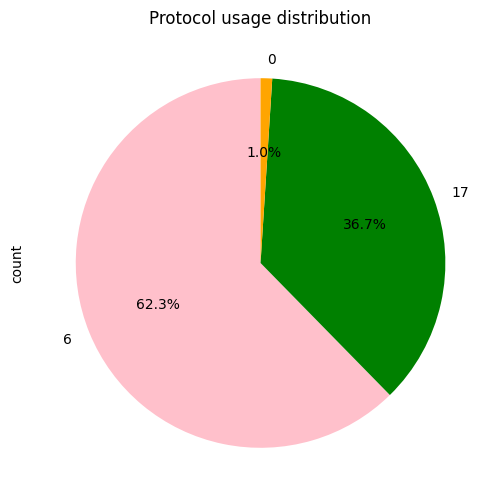

In [9]:

plt.figure(figsize=(8,6))
Protocol=df['Protocol'].value_counts()
color=['pink','green','orange']
Protocol.plot(kind='pie',autopct='%1.1f%%',startangle=90,colors= color)
plt.title('Protocol usage distribution')
plt.show()


checking label data against the category

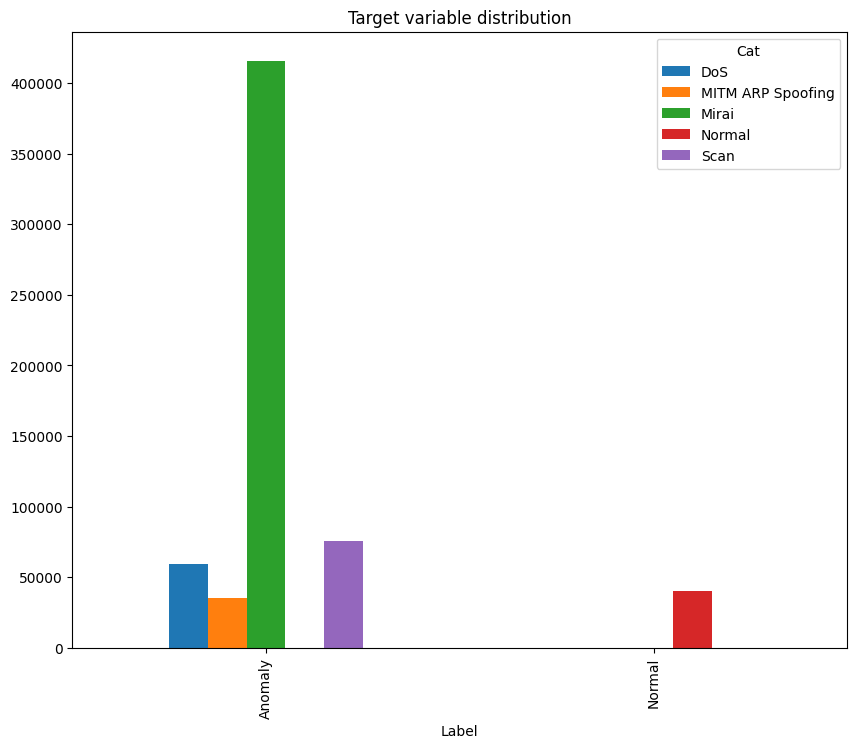

In [10]:
target_variable=df.groupby(['Label','Cat'])['Sub_Cat'].count().unstack().fillna(0)
target_variable.plot(kind='bar',figsize=(10,8))
plt.title('Target variable distribution')
plt.show()


merging the category (based on the label (anomaly and normal)) together

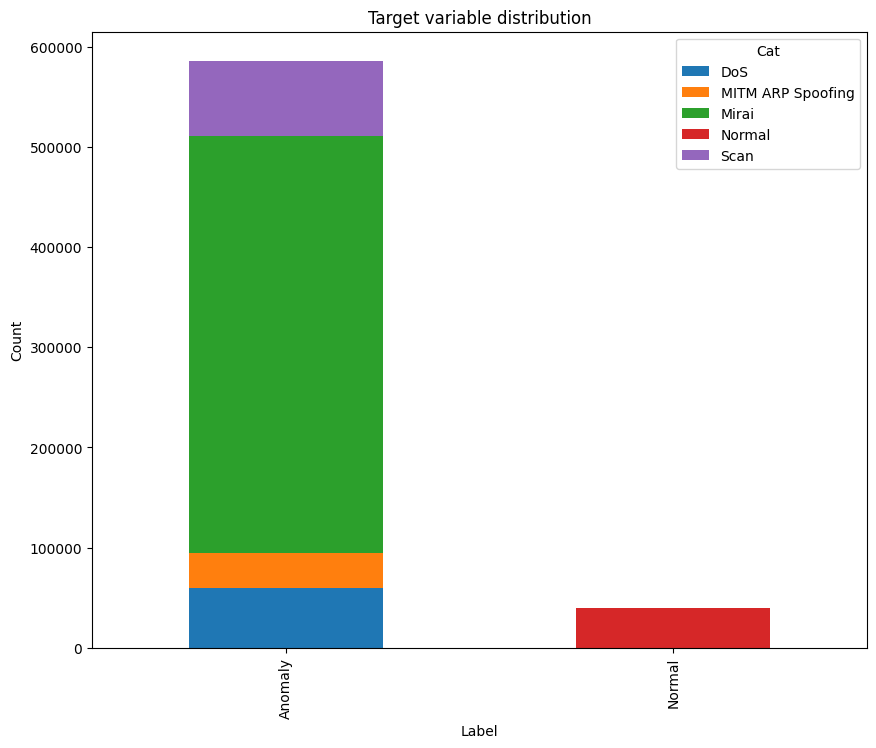

In [11]:
target_variable=df.groupby(['Label','Cat'])['Sub_Cat'].count().unstack().fillna(0)
target_variable.plot(kind='bar', stacked=True,figsize=(10,8))
plt.title('Target variable distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


 scatter plot for flow duration and total forward packets

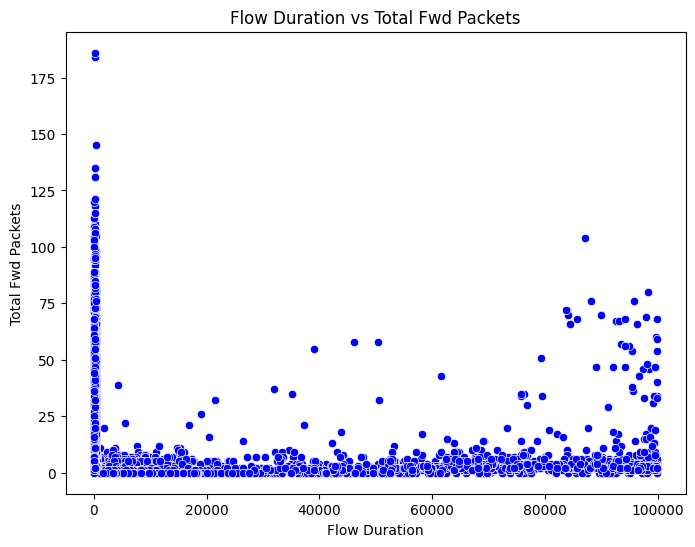

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Flow_Duration',y='Tot_Fwd_Pkts',data=df,color='blue')
plt.title('Flow Duration vs Total Fwd Packets')
plt.xlabel('Flow Duration')
plt.ylabel('Total Fwd Packets')
plt.show()

bar chart for protocol against forward and backward packets

<Figure size 800x600 with 0 Axes>

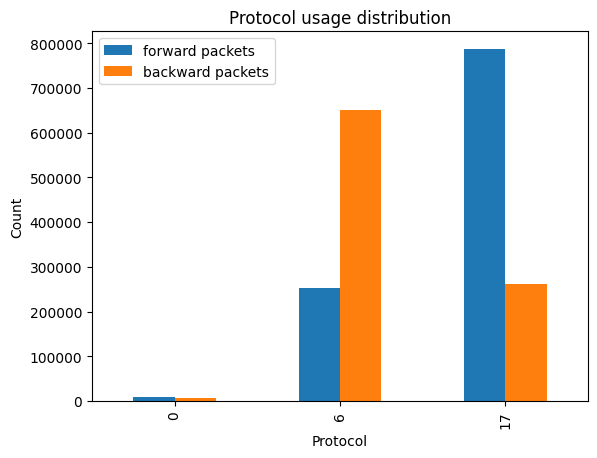

In [13]:
plt.figure(figsize=(8,6))
packets=df['Protocol'].astype('category')
forward_packets=df.groupby('Protocol')['Tot_Fwd_Pkts'].sum()
backward_packets=df.groupby('Protocol')['Tot_Bwd_Pkts'].sum()
data= pd.DataFrame({'forward packets':forward_packets,'backward packets':backward_packets})
data.plot(kind='bar')
plt.title('Protocol usage distribution')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.show()

checking the total number of elements in the category

In [14]:
category=df['Cat'].value_counts()
print (category)

Cat
Mirai                415677
Scan                  75265
DoS                   59391
Normal                40073
MITM ARP Spoofing     35377
Name: count, dtype: int64


bar chart for category in the dataset

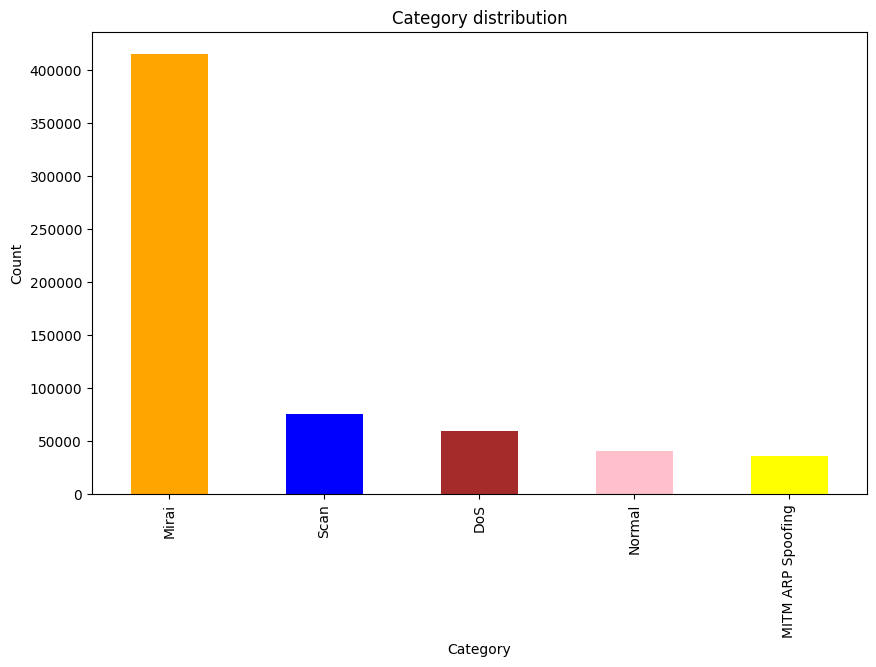

In [15]:
plt.figure(figsize=(10,6))
color=['orange','blue','brown','pink','yellow']
category.plot(kind='bar', color=color)
plt.title('Category distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


pie chart showing the category distribution

Text(0.5, 1.0, 'Category distribution')

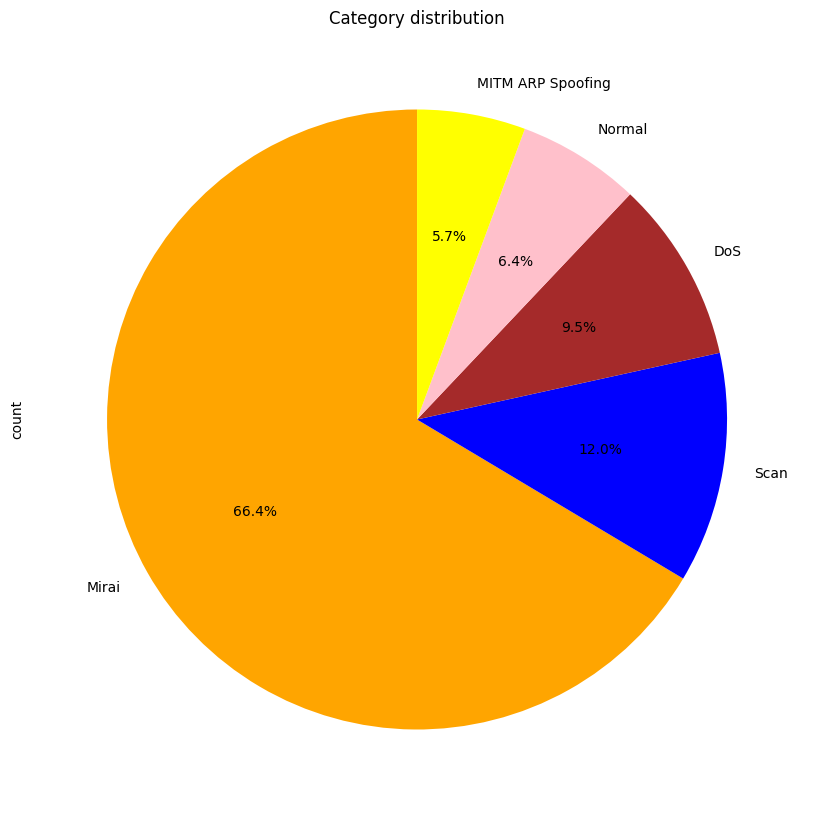

In [16]:
plt.figure(figsize=(10,15))
color=['orange','blue','brown','pink','yellow']
category.plot(kind='pie',autopct='%1.1f%%',startangle=90,colors= color)
plt.title('Category distribution')

total number of elements in sub category

In [17]:
sub_category=df['Sub_Cat'].value_counts()
print(sub_category)

Sub_Cat
Mirai-UDP Flooding       183554
Mirai-Hostbruteforceg    121181
DoS-Synflooding           59391
Mirai-HTTP Flooding       55818
Mirai-Ackflooding         55124
Scan Port OS              53073
Normal                    40073
MITM ARP Spoofing         35377
Scan Hostport             22192
Name: count, dtype: int64


bar chart for sub category

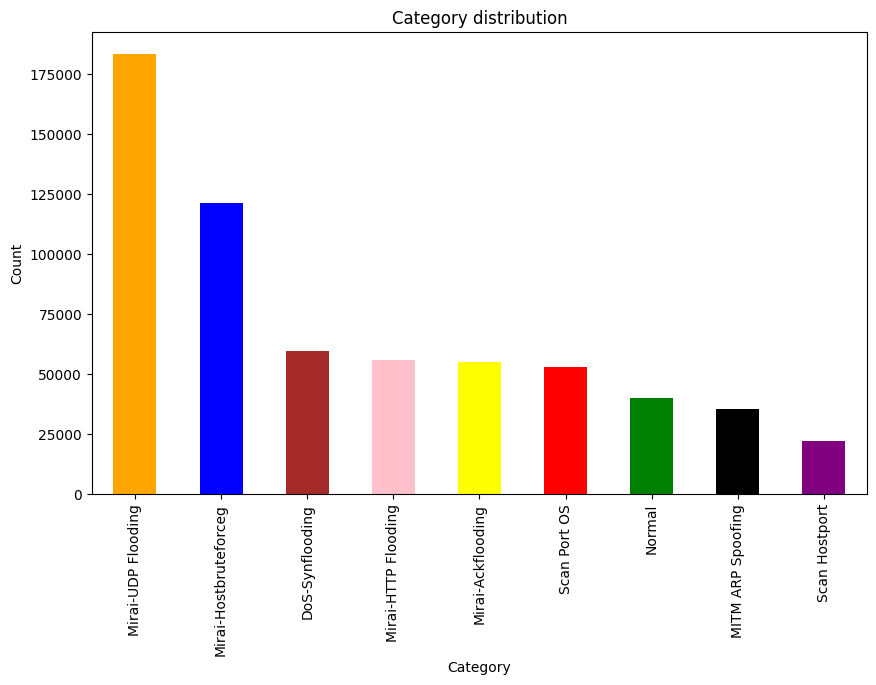

In [18]:
plt.figure(figsize=(10,6))
color=['orange','blue','brown','pink','yellow','red','green','black','purple']
sub_category.plot(kind='bar', color=color)
plt.title('Category distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

pie chart for sub category

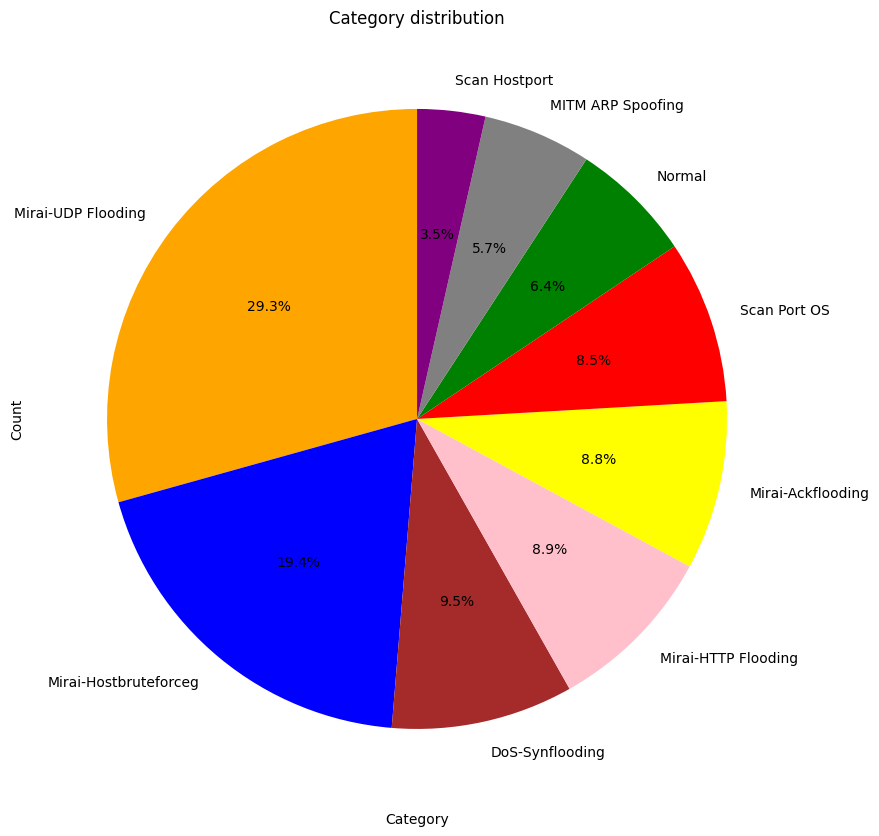

In [19]:
plt.figure(figsize=(10,15))
color=['orange','blue','brown','pink','yellow','red','green','grey','purple']
sub_category.plot(kind='pie',autopct='%1.1f%%',startangle=90,colors= color)
plt.title('Category distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

## print unique element label


In [20]:
unique_label=df['Label'].unique()
print(unique_label)

['Anomaly' 'Normal']


In [21]:
# Count the number of occurrences of each element in the 'Label' column
label_counts = df['Label'].value_counts()
print("Count of each element in 'Label' column:\n", label_counts)

Count of each element in 'Label' column:
 Label
Anomaly    585710
Normal      40073
Name: count, dtype: int64


In [22]:
df.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [23]:
df= df.drop(columns=['Flow_ID','Timestamp'])
print (df)

                 Src_IP  Src_Port           Dst_IP  Dst_Port  Protocol  \
0          192.168.0.13     10000     192.168.0.16     10101        17   
1       222.160.179.132      2179     192.168.0.13       554         6   
2          192.168.0.16     52727     192.168.0.13      9020         6   
3          192.168.0.16     52964     192.168.0.13      9020         6   
4           192.168.0.1     36763  239.255.255.250      1900        17   
...                 ...       ...              ...       ...       ...   
625778     192.168.0.24     56112    210.89.164.90      8043        17   
625779  222.131.171.244      4570     192.168.0.13       554         6   
625780     192.168.0.16     52739     192.168.0.13      9020         6   
625781     192.168.0.13      9020     192.168.0.16     49784         6   
625782     192.168.0.13     10000     192.168.0.16     10101        17   

        Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  TotLen_Fwd_Pkts  \
0                  75             1      

In [24]:
## seperate the columns into numeric and object types
numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object']).columns
## create separate Dataframes for numeric and object columns
df_numeric = df[numeric_columns]
df_categorical = df[categorical_columns]

##print the first few rows of both dataframes
print("Numeric columns:")
print(df_numeric.head())
print("\nCategorical columns:")
print(df_categorical.head())

Numeric columns:
   Src_Port  Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  \
0     10000     10101        17             75             1             1   
1      2179       554         6           5310             1             2   
2     52727      9020         6            141             0             3   
3     52964      9020         6            151             0             2   
4     36763      1900        17            153             2             1   

   TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  ...  \
0            982.0           1430.0            982.0            982.0  ...   
1              0.0              0.0              0.0              0.0  ...   
2              0.0           2806.0              0.0              0.0  ...   
3              0.0           2776.0              0.0              0.0  ...   
4            886.0            420.0            452.0            434.0  ...   

   Fwd_Act_Data_Pkts  Fwd_Seg_Size_Min  Activ

In [26]:
## intialize label encoder
label_encoder= LabelEncoder()

## apply label encoder to each object coluns
for col in df_categorical.columns:
  df_categorical[col]=label_encoder.fit_transform(df_categorical[col])

## print the first few rows of the updated dataframe
print(df_categorical.head())

<ipython-input-26-3ebd8d2f17d3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[col]=label_encoder.fit_transform(df_categorical[col])
<ipython-input-26-3ebd8d2f17d3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[col]=label_encoder.fit_transform(df_categorical[col])
<ipython-input-26-3ebd8d2f17d3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

   Src_IP  Dst_IP  Label  Cat  Sub_Cat
0   25883     203      0    2        2
1   34617     200      0    0        0
2   25886     200      0    4        8
3   25886     200      0    2        4
4   25881     317      0    2        4


<ipython-input-26-3ebd8d2f17d3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[col]=label_encoder.fit_transform(df_categorical[col])


In [27]:
df=pd.concat([df_numeric,df_categorical],axis=1)
print(df.head())

   Src_Port  Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  \
0     10000     10101        17             75             1             1   
1      2179       554         6           5310             1             2   
2     52727      9020         6            141             0             3   
3     52964      9020         6            151             0             2   
4     36763      1900        17            153             2             1   

   TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  ...  \
0            982.0           1430.0            982.0            982.0  ...   
1              0.0              0.0              0.0              0.0  ...   
2              0.0           2806.0              0.0              0.0  ...   
3              0.0           2776.0              0.0              0.0  ...   
4            886.0            420.0            452.0            434.0  ...   

   Active_Min  Idle_Mean     Idle_Std  Idle_Max  Idle_Min  Src

In [28]:
df.head()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Src_IP,Dst_IP,Label,Cat,Sub_Cat
0,10000,10101,17,75,1,1,982.0,1430.0,982.0,982.0,...,0.0,75.0,0.000000,75.0,75.0,25883,203,0,2,2
1,2179,554,6,5310,1,2,0.0,0.0,0.0,0.0,...,0.0,2655.0,2261.327486,4254.0,1056.0,34617,200,0,0,0
2,52727,9020,6,141,0,3,0.0,2806.0,0.0,0.0,...,0.0,70.5,0.707107,71.0,70.0,25886,200,0,4,8
3,52964,9020,6,151,0,2,0.0,2776.0,0.0,0.0,...,0.0,151.0,0.000000,151.0,151.0,25886,200,0,2,4
4,36763,1900,17,153,2,1,886.0,420.0,452.0,434.0,...,0.0,76.5,0.707107,77.0,76.0,25881,317,0,2,4


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 84 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Src_Port           625783 non-null  int64  
 1   Dst_Port           625783 non-null  int64  
 2   Protocol           625783 non-null  int64  
 3   Flow_Duration      625783 non-null  int64  
 4   Tot_Fwd_Pkts       625783 non-null  int64  
 5   Tot_Bwd_Pkts       625783 non-null  int64  
 6   TotLen_Fwd_Pkts    625783 non-null  float64
 7   TotLen_Bwd_Pkts    625783 non-null  float64
 8   Fwd_Pkt_Len_Max    625783 non-null  float64
 9   Fwd_Pkt_Len_Min    625783 non-null  float64
 10  Fwd_Pkt_Len_Mean   625783 non-null  float64
 11  Fwd_Pkt_Len_Std    625783 non-null  float64
 12  Bwd_Pkt_Len_Max    625783 non-null  float64
 13  Bwd_Pkt_Len_Min    625783 non-null  float64
 14  Bwd_Pkt_Len_Mean   625783 non-null  float64
 15  Bwd_Pkt_Len_Std    625783 non-null  float64
 16  Fl

In [30]:
df.isnull().sum()

,0
Src_Port,0
Dst_Port,0
Protocol,0
Flow_Duration,0
Tot_Fwd_Pkts,0
...,...
Src_IP,0
Dst_IP,0
Label,0
Cat,0


In [33]:


df=df.replace([float('inf'), -float('inf')], float('nan'))
df=df.fillna(0)
df=df.apply(lambda x:x.astype(int) if x.dtype=='float64' else x)

In [34]:
X=df.drop(columns=['Label'])
y=df['Label']
print (X.shape)
print(y.shape)

(625783, 83)
(625783,)


In [35]:
X.head()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Src_IP,Dst_IP,Cat,Sub_Cat
0,10000,10101,17,75,1,1,982,1430,982,982,...,0,0,75,0,75,75,25883,203,2,2
1,2179,554,6,5310,1,2,0,0,0,0,...,0,0,2655,2261,4254,1056,34617,200,0,0
2,52727,9020,6,141,0,3,0,2806,0,0,...,0,0,70,0,71,70,25886,200,4,8
3,52964,9020,6,151,0,2,0,2776,0,0,...,0,0,151,0,151,151,25886,200,2,4
4,36763,1900,17,153,2,1,886,420,452,434,...,0,0,76,0,77,76,25881,317,2,4


In [37]:
X_train, y_train, X_test, y_test= train_test_split(X,y, test_size=0.3, random_state=42)

In [38]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(438048, 83)
(187735, 83)
(438048,)
(187735,)
